# 5. 递归 Recursion

## 5.1 递归的定义
将问题分解为规模更小的相同问题，直到可以用非常简单直接的方式来解决，典型的特征是在算法流程中调用自身。

以数列求和为例：

In [1]:
# 基于循环语句的列表求和函数
def listsum(numList):
    theSum = 0
    for num in numList:
        theSum += num
    return theSum
print(listsum([1, 2, 3, 4, 5]))  # 输出 15

15


用递归来解决数列求和问题，可以考虑一个全括号表达式：(1+(3+(5+(7+9))))，所以数列求和相当于第一个数+余下数列的和。如果数列的数只剩一个的话，它的和就是这个数本身。

In [2]:
def listsum(numList):
    if len(numList) == 1:
        return numList[0]
    else:
        return numList[0] + listsum(numList[1:])  # 调用函数自身listsum()
print(listsum([1, 2, 3, 4, 5]))

15


递归三定律：
1. 必须有一个基本结束条件（最小规模问题的直接解决）；eg. 例如只剩一个元素时怎么处理；
2. 必须能改变状态向基本结束条件演进（减小问题规模）；
3. 必须调用自身；

## 5.2 递归调用的实现
调用的实现：当函数被调用时，系统会把调用的现场数据压入到系统调用栈，每次调用，压入栈的现场数据成为栈帧。当函数返回时，要从调用栈的栈顶取得返回地址，恢复现场，弹出栈帧，按地址返回。总体是一个先入后出的次序。

递归深度限制：检查是否设置基本结束条件，若缺少基本结束条件，或向基本结束条件演进速度过慢，均可能导致栈溢出。出现RecusionError。

In [3]:
# 查看递归深度限制
import sys
sys.getrecursionlimit()

3000

## 5.3 递归的应用

### 5.3.1 整数转换为任意进制
递归问题分解：
1. 余数总是小于进制基base，是基本结束条件，可以直接查表转换；
2. 整数商成为“更小规模”问题，通过递归调用自身解决；

In [4]:
def toStr(n, base):
    convertString = "0123456789ABCDEF"
    if n < base:
        return convertString[n] # 最小规模
    else:
        return toStr(n // base, base) + convertString[n % base]  # 减小规模，调用自身toStr()
print(toStr(1453, 16))  # 输出 5AD

5AD


### 5.3.2 汉诺塔
逐步分解：以五个盘子三个柱子为例，将上面四个盘子看作一个整体，则只需三步就可以从1#挪到3#柱；而四个盘子怎么挪？同理，将最上面三个盘子看作整体...

最小规模问题：一个盘片的移动

In [6]:
def moveTower(height, fromPole, withPole, toPole):
    if height >= 1:
        moveTower(height - 1, fromPole, toPole, withPole)   # 移动N-1个盘子到辅助柱子
        moveDisk(height, fromPole, toPole) # 移动最底下的盘子到目标柱子
        moveTower(height - 1, withPole, fromPole, toPole)   # 把辅助柱子上的N-1个盘子移动到目标柱子

def moveDisk(disk, fromPole, toPole):
    print(f"Move disk[{disk}] from {fromPole} to {toPole}")
moveTower(3, "A", "C", "B")  # A、B、C分别表示三根柱子

Move disk[1] from A to B
Move disk[2] from A to C
Move disk[1] from B to C
Move disk[3] from A to B
Move disk[1] from C to A
Move disk[2] from C to B
Move disk[1] from A to B


### 5.3.3 探索迷宫
必须定义基本结束条件：
1. 碰到墙壁，递归调用结束；
2. 碰到面包屑，调用结束；
3. 碰到出口，调用结束；
4. 四个方向都探索失败，调用结束；

探索成功则标记该点可行，四个方向都失败则标注死胡同。

In [ ]:
import turtle

# 定义迷宫地图与常量
# + 代表墙壁
# S 代表起点
# 空格代表通路
# E 代表出口
MAZE_MAP = [
    "+++++++++++++++",
    "+S+       +   E",
    "+ +++++ +++ + +",
    "+ +   + +   + +",
    "+ + + + + + + +",
    "+   + +   + + +",
    "+++++ +++ + + +",
    "+   +     +   +",
    "+ + +++++ + +++",
    "+ +       +   +",
    "+++++++++++++++"
]

PART_OF_PATH = 'O'  # 标记为正确路径
TRIED = '.'         # 标记为已尝试过
OBSTACLE = '+'      # 墙壁
DEAD_END = '-'      # 死胡同

# 绘制迷宫并定义迷宫的逻辑
class Maze:
    def __init__(self, maze_grid, turtle_obj):
        self.maze_list = [list(row) for row in maze_grid] # 转为二维列表以便修改
        self.rows_in_maze = len(self.maze_list)
        self.cols_in_maze = len(self.maze_list[0])
        self.t = turtle_obj
        self.t.shape('turtle')
        self.t.speed(0)  # 最快速度绘制地图
        
        # 设置坐标系，让(0,0)在左上角，便于对应列表索引
        # 参数解释: setworldcoordinates(llx, lly, urx, ury)
        self.t.getscreen().setworldcoordinates(-1, -1, self.cols_in_maze, self.rows_in_maze)

    def draw_maze(self):
        """绘制迷宫的基础墙壁"""
        self.t.speed(0)
        self.t.hideturtle()
        for y in range(self.rows_in_maze):
            for x in range(self.cols_in_maze):
                if self.maze_list[y][x] == OBSTACLE:
                    self.draw_centered_box(x, self.rows_in_maze - y - 1, 'orange')
        self.t.showturtle()
        self.t.speed(2) # 恢复探索速度

    def draw_centered_box(self, x, y, color):
        """在指定坐标画方块"""
        self.t.up()
        self.t.goto(x - 0.5, y - 0.5)
        self.t.color(color)
        self.t.fillcolor(color)
        self.t.setheading(90)
        self.t.down()
        self.t.begin_fill()
        for _ in range(4):
            self.t.forward(1)
            self.t.right(90)
        self.t.end_fill()

    def update_position(self, row, col, val=None):
        """更新海龟位置并留下痕迹"""
        # 逻辑坐标转屏幕坐标：Y轴需要翻转
        x = col
        y = self.rows_in_maze - row - 1
        
        self.t.up()
        self.t.goto(x, y)
        
        if val:
            self.maze_list[row][col] = val
        
        # 根据状态改变颜色
        if val == PART_OF_PATH:
            self.t.color('green') # 找到路径
        elif val == OBSTACLE:
            self.t.color('red')
        elif val == TRIED:
            self.t.color('black') # 正在尝试
        elif val == DEAD_END:
            self.t.color('red')   # 死胡同
        
        self.t.down()
        self.t.dot(10) # 打点标记

    def is_exit(self, row, col):
        """判断是否到达边缘（出口）"""
        return (row == 0 or
                row == self.rows_in_maze - 1 or
                col == 0 or
                col == self.cols_in_maze - 1)

# 核心递归函数
def search_from(maze, start_row, start_col):
    # 1. 碰到墙壁，返回 False
    if maze.maze_list[start_row][start_col] == OBSTACLE:
        return False
    
    # 2. 碰到已经走过的路（防止死循环）或死胡同，返回 False
    if maze.maze_list[start_row][start_col] == TRIED or \
       maze.maze_list[start_row][start_col] == DEAD_END:
        return False
    
    # 3. 找到了出口！返回 True
    if maze.is_exit(start_row, start_col):
        maze.update_position(start_row, start_col, PART_OF_PATH)
        return True
    
    # --- 递归部分 ---
    
    # 标记当前点为“正在尝试 (TRIED)”
    maze.update_position(start_row, start_col, TRIED)
    
    # 尝试向四个方向递归：北、南、西、东
    # 如果任意一个方向返回 True，说明找到路了
    found = search_from(maze, start_row - 1, start_col) or \
            search_from(maze, start_row + 1, start_col) or \
            search_from(maze, start_row, start_col - 1) or \
            search_from(maze, start_row, start_col + 1)
    
    if found:
        # 如果找到了，标记当前点为路径的一部分
        maze.update_position(start_row, start_col, PART_OF_PATH)
    else:
        # 如果四个方向都不通，标记为死胡同 (回溯)
        maze.update_position(start_row, start_col, DEAD_END)
        
    return found


def main():
    my_turtle = turtle.Turtle()
    my_window = turtle.Screen()
    my_window.setup(width=600, height=600)
    my_window.title("递归迷宫求解可视化")
    
    # 初始化迷宫对象
    my_maze = Maze(MAZE_MAP, my_turtle)
    my_maze.draw_maze()
    
    # 寻找起点 'S' 的坐标
    start_row, start_col = 0, 0
    for r in range(my_maze.rows_in_maze):
        for c in range(my_maze.cols_in_maze):
            if my_maze.maze_list[r][c] == 'S':
                start_row, start_col = r, c
                break

    # 开始递归探索
    my_turtle.getscreen().tracer(1) # 开启每步动画
    search_from(my_maze, start_row, start_col)
    
    # 点击窗口关闭
    my_window.exitonclick()

if __name__ == '__main__':
    main()

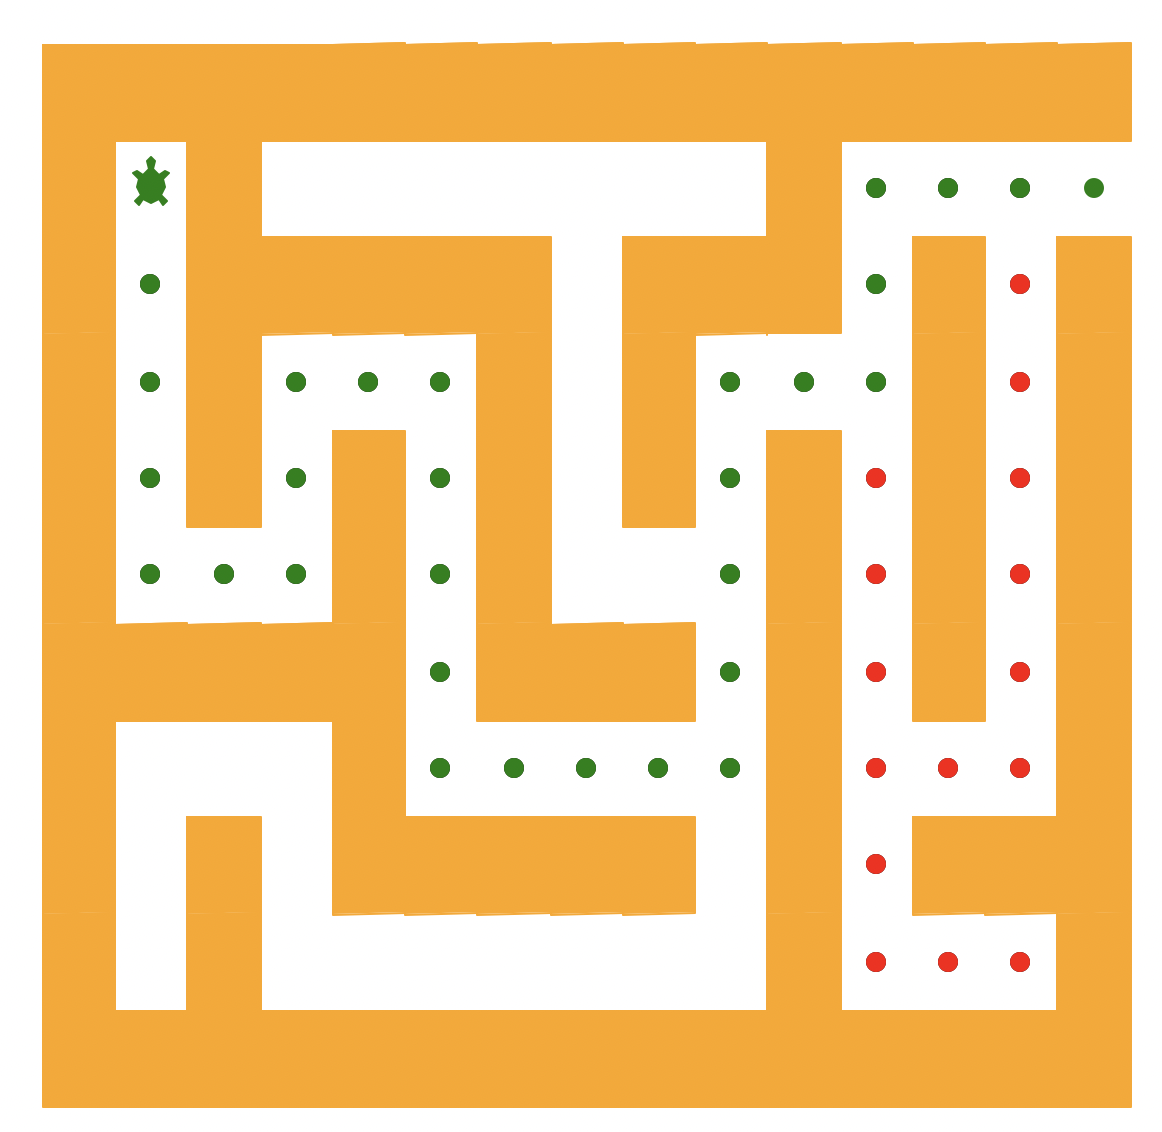

## 5.4 递归可视化

### 5.4.1 分行树
分形是在不同尺度上都具有相似性的事物（例如每个树枝有分叉，整棵树其实也是有分叉的形状，两者类似），可以通过递归来实现分形。

In [ ]:
import turtle
def tree(branchLen, t):
    if branchLen > 5:   # 递归结束条件
        t.forward(branchLen)    # 向前画枝干
        t.right(20) # 右转20度
        tree(branchLen - 15, t) # 递归调用
        t.left(40)  # 左转40度
        tree(branchLen - 15, t) # 递归调用
        t.right(20) # 右转20度
        t.backward(branchLen)   # 向后画枝干

t = turtle.Turtle()
myWin = turtle.Screen()
t.left(90)  # 画笔向上
t.up()   # 提起画笔
t.backward(100)    # 向后移动100
t.down() # 落下画笔
t.color("green")
tree(75, t)    # 调用tree函数，开始画树

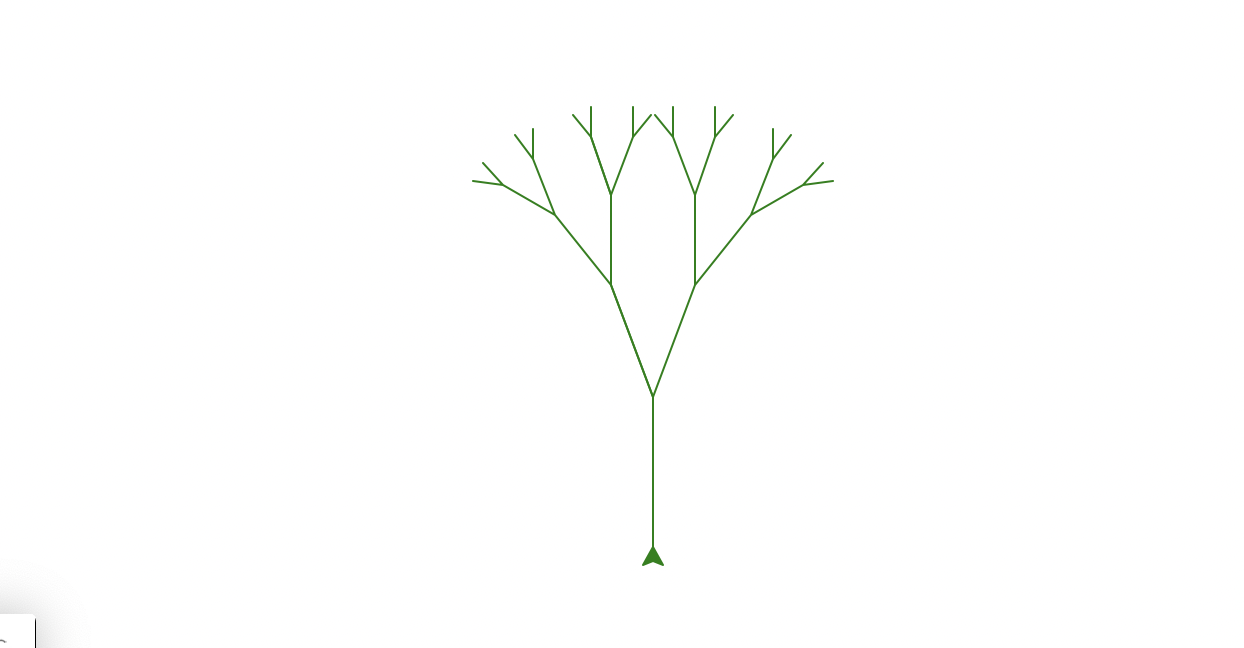

In [ ]:
# 递归绘制螺旋线
import turtle
t = turtle.Turtle()
def drawSpiral(t, lineLen):
    if lineLen > 0:
        t.forward(lineLen)
        t.right(90)
        drawSpiral(t, lineLen - 5)  # 调用自身drawSpiral()
drawSpiral(t,100)
turtle.done()

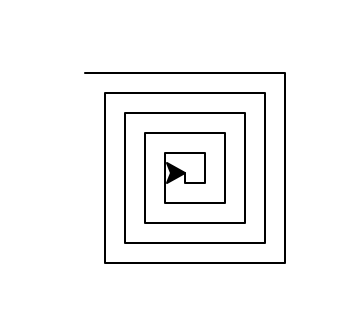

### 5.4.2 谢尔宾斯基三角形
谢尔宾斯基三角形：不断在三角形中心挖去一个三角形。最终，其面积为0，但周长无穷，是介于一维和二维之间的分数维。

In [ ]:
import turtle
def sierpinski(degree, points):
    colormap = ['blue', 'red', 'green', 'white', 'yellow', 'violet', 'orange']
    drawTriangle(points, colormap[degree])
    if degree > 0:  # 递归结束条件
        sierpinski(degree - 1, # 左下三角形
                   {'left': points['left'],
                    'top': getMid(points['left'], points['top']),
                    'right': getMid(points['right'], points['left'])})
        sierpinski(degree - 1, # 顶部三角形
                   {'left': getMid(points['left'], points['top']),
                    'top': points['top'],
                    'right': getMid(points['top'], points['right'])})
        sierpinski(degree - 1, # 右下三角形
                   {'left': getMid(points['right'], points['left']),
                    'top': getMid(points['top'], points['right']),
                    'right': points['right']})
        
def drawTriangle(points, color):    # 画三角形并填充颜色
    t.fillcolor(color)
    t.up()
    t.goto(points['left'][0], points['left'][1])
    t.down()
    t.begin_fill()
    t.goto(points['right'][0], points['right'][1])
    t.goto(points['top'][0], points['top'][1])
    t.goto(points['left'][0], points['left'][1])
    t.end_fill()
def getMid(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
t = turtle.Turtle()
points = {'left': (-200, -100), 'right': (0, -100), 'top': (-100, 100)}
sierpinski(5, points)
turtle.done()

: 

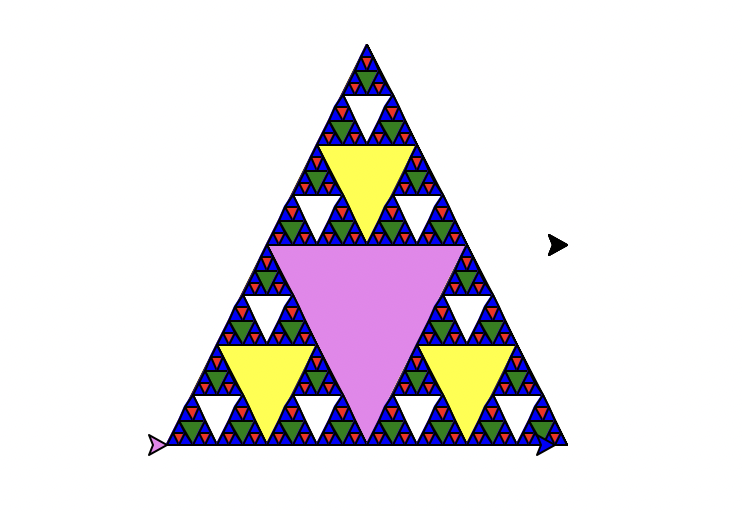